# Labor Model 

In [1]:
from scipy.optimize import least_squares
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from tqdm import tqdm 
import pandas as pd 
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Models with and without TR

In [2]:
def labor_model_self_emp(x):
    F = np.zeros(10)
    #household eq. for eta
    F[0]  = x[0]*(1+beta_f*tau_l)-x[1]-beta_i*tau_ncsb
    #self-employment at z1
    F[1]  = x[6]-((gamma/x[1])**(1/(1-gamma))*x[2])
    #equilibrium for z1
    F[2]  = (x[1]*(1+x[6]-kai))-(x[2]**(1-gamma)*(x[6]**gamma))
    #total labor demand from employer
    F[3]  = x[3]+((1+tau_l)*(x[0]/x[1])-1)/(2*lambda_l*sigma_l*tau_l*x[5])-((gamma/((1+tau_l)*x[0]))**(1/(1-gamma))*x[5])
    #self-employment at z2
    F[4]  = x[7]-(gamma/x[1])**(1/(1-gamma))*x[5]
    #labor market equilibrium
    F[5]  = ((S/(1-S))*z_lb**S*(kai*(gamma/x[1])**(1/(1-gamma))*(x[5]**(1-S)-x[2]**(1-S))+(gamma/(1+tau_l)*x[0])**(1/(1-gamma))*(z_ub**(1-S)-x[5]**(1-S))))-1+kai*(z_lb/x[5])**S+(1-kai)*(z_lb/x[2])**S
    #goods market equilibrium
    F[6]  = tau_ncsb*((1-(z_lb/z_ub)**S)/z_lb)+x[1]*(z_lb**(-S)+kai*x[5]**(-S))-(1-kai)*x[1]*(x[2]**(-S))-(S/(1+S))*((((1+tau_l)*x[0])**2)-x[1]**2)/(2*lambda_l*sigma_l*tau_l*x[1])*(z_ub**(-S-1)-x[1]**(-S-1))*gamma**(1/(1-gamma))-(S/(1-S))*((1/x[1])**(gamma/(1-gamma))*(x[5]**(1-S)-x[2]**(1-S))+((1/(1+tau_l)*x[0])**(gamma/(1-gamma)))*(z_ub**(1-S)-x[5]**(1-S)))
    #equilibrium for z2
    F[7]  = x[2]**(1-gamma)*x[7]**gamma+x[1]*(kai-x[2])-(1-tau_pi)*(x[5]**(1-gamma)*x[7]**gamma-(1+tau_l)*x[1]*x[3]-(1+lambda_l*x[7]*x[5]*sigma_l*tau_l)*x[7])
    #government budget before reform
    F[8]  = ((gamma**(gamma/(1-gamma)))-(gamma**(1/(1-gamma))))*(1/((1+tau_l)*x[0]))**(gamma/(1-gamma))*((z_ub**(1-S)-x[5]**(1-S))/(1-S))-(((1+tau_l)**2*x[0]**2/x[1]-2*(1+tau_l)+x[1])/4*lambda_l*sigma_l*tau_l)*((z_ub**(-S-1)-x[5]**(-S-1))/(1+S))+(tau_ncsb/(tau_pi*S))*((1-x[8])*(x[2]**(-S)-z_lb**(-S))+kai*(x[5]**(-S)-x[2]**(-S))+z_ub**(-S)-x[5]**(-S))
    #share of formality
    F[9] = x[8] - ((S/(1+S))*(z_lb**S*(x[5]**(-S-1)-z_ub**(-S-1))/(1-(z_lb/z_ub)**S)*((1+tau_l)*(x[0]/x[1])-1)/(2*lambda_l*sigma_l*tau_l))) / ((S/(1-S))*(gamma/(1+tau_l)*x[0]**(1/(1-gamma))*z_lb*(z_ub**(1-S)-x[5]**(1-S))/(1-(z_lb/z_ub)**S)))

    return F

def labor_model_self_emp_tr(x):
    F = np.zeros(11)
    #household eq. for eta
    F[0]  = x[0]+beta_f*x[9]-x[1]-beta_i*tau_ncsb
    #contributory social benefits
    F[1]  = x[9]-tau_l*x[0]+((tau_pi_tr*S)/(x[8]*(x[2]**(-S)-z_lb**(-S))))*(gamma**(gamma/(1-gamma))-gamma**(1/(1-gamma)))*((1/((1+tau_l)*x[0]))**(gamma/(1-gamma)))*((z_ub**(1-S)-x[5]**(1-S))/(1-S))-((((1+tau_l)**2)*((x[0]**2)/x[1])-2*(1+tau_l)*x[0]+x[1])/(4*lambda_l*sigma_l*tau_l))*((z_ub**(-S-1)-x[5]**(-S-1))/(1+S))
    #self-employment at z1
    F[2]  = x[6]-((gamma/x[1])**(1/(1-gamma))*x[2])
    #equilibrium for z1
    F[3]  = (x[1]*(1+x[6]-kai))-(x[2]**(1-gamma)*(x[6]**gamma))
    #total labor demand from employer
    F[4]  = x[3]+((1+tau_l)*(x[0]/x[1])-1)/(2*lambda_l*sigma_l*tau_l*x[5])-((gamma/((1+tau_l)*x[0]))**(1/(1-gamma))*x[5])
    #self-employment at z2
    F[5]  = x[7]-(gamma/x[1])**(1/(1-gamma))*x[5]
    #labor market equilibrium
    F[6]  = ((S/(1-S))*z_lb**S*(kai*(gamma/x[1])**(1/(1-gamma))*(x[5]**(1-S)-x[2]**(1-S))+(gamma/(1+tau_l)*x[0])**(1/(1-gamma))*(z_ub**(1-S)-x[5]**(1-S))))-1+kai*(z_lb/x[5])**S+(1-kai)*(z_lb/x[2])**S
    #goods market equilibrium
    F[7]  = tau_ncsb*((1-(z_lb/z_ub)**S)/z_lb)+x[1]*(z_lb**(-S)+kai*x[5]**(-S))-(1-kai)*x[1]*(x[2]**(-S))-(S/(1+S))*((((1+tau_l)*x[0])**2)-x[1]**2)/(2*lambda_l*sigma_l*tau_l*x[1])*(z_ub**(-S-1)-x[1]**(-S-1))*gamma**(1/(1-gamma))-(S/(1-S))*((1/x[1])**(gamma/(1-gamma))*(x[5]**(1-S)-x[2]**(1-S))+((1/(1+tau_l)*x[0])**(gamma/(1-gamma)))*(z_ub**(1-S)-x[5]**(1-S)))
    #equilibrium for z2
    F[8]  = x[2]**(1-gamma)*x[7]**gamma+x[1]*(kai-x[2])-(1-tau_pi_0-tau_pi_tr)*(x[5]**(1-gamma)*x[7]**gamma-(1+tau_l)*x[1]*x[3]-(1+lambda_l*x[7]*x[5]*sigma_l*tau_l)*x[7])
    #government budget before reform
    F[9]  = ((gamma**(gamma/(1-gamma)))-(gamma**(1/(1-gamma))))*(1/((1+tau_l)*x[0]))**(gamma/(1-gamma))*((z_ub**(1-S)-x[5]**(1-S))/(1-S))-(((1+tau_l)**2*x[0]**2/x[1]-2*(1+tau_l)+x[1])/4*lambda_l*sigma_l*tau_l)*((z_ub**(-S-1)-x[5]**(-S-1))/(1+S))+(tau_ncsb/((tau_pi_0+tau_pi_tr)*S))*((1-x[8])*(x[2]**(-S)-z_lb**(-S))+kai*(x[5]**(-S)-x[2]**(-S))+z_ub**(-S)-x[5]**(-S))
    #share of formality
    F[10] = x[8] - ((S/(1+S))*(z_lb**S*(x[5]**(-S-1)-z_ub**(-S-1))/(1-(z_lb/z_ub)**S)*((1+tau_l)*(x[0]/x[1])-1)/(2*lambda_l*sigma_l*tau_l))) / ((S/(1-S))*(gamma/(1+tau_l)*x[0]**(1/(1-gamma))*z_lb*(z_ub**(1-S)-x[5]**(1-S))/(1-(z_lb/z_ub)**S)))

    return F

In [3]:
# Non calibrated parameters
beta_f   = 0.480
beta_i   = 0.525
tau_l    = 0.603 # Anton uses 0.603
tau_pi   = 1/3
sigma_l  = 1.500
gamma    = 2/3   # Anton uses 0.33 for capital share
z_lb     = 1.000 # Leal: 1
kai      = 0.4

In [7]:
# Simulation parameters and variables
n_steps = 10
all_vec = []
results = []
# x0 = [1,    1,   1,  1,  1,  1,  1,  1, .5,1]

In [8]:
# Optimal values
shr_inf_emp_opt = 56.2
shr_inf_emp_tr_opt = 49.5
w_f_w_l_opt = 1.94
w_f_w_l_tr_opt = 1.94

### Calibration 

In [9]:
all_vec = []
results = []
cost = []

for tau_ncsb in tqdm(np.linspace(0.2,8,n_steps)):
    for lambda_l in np.linspace(0.1,0.9,n_steps):
        for z_ub in np.linspace(1.1,6,n_steps):
            for S in np.linspace(0.1,0.9,n_steps):
                x0 = [1,    1,   1,  1,  1,  1,  1,  1, .5]
                res = least_squares(labor_model_self_emp,x0)
                # results
                w_f_w_l = res.x[0]/res.x[1]
                shr_inf_emp = (1-res.x[8])*100 
                # results of interest
                all_vec.append([tau_ncsb,lambda_l,z_ub,S,shr_inf_emp,w_f_w_l])
                results.append(res.x)
                cost.append(res.cost)


  0%|          | 0/10 [00:00<?, ?it/s]/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/torroledo/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/torroledo/anaconda3/lib/python3.6/site-p

In [10]:
calibration = pd.DataFrame(all_vec,columns=['tau_ncsb','lambda_l','z_ub','S','shr_inf_emp','w_f_w_l'])
calibration['cost'] = cost
model_values = pd.DataFrame(np.array(results),columns=['wf','wi','z1','f_z2','i_z2','z2','se_z1','se_z2','sh_f'])

In [11]:
calibration.head()

,tau_ncsb,lambda_l,z_ub,S,shr_inf_emp,w_f_w_l,cost
0,0.2,0.1,1.1,0.100000,-1441.217870,0.992357,0.128689
1,0.2,0.1,1.1,0.188889,-775.334762,0.988296,0.100936
2,0.2,0.1,1.1,0.277778,-644.855914,0.974864,0.072854
3,0.2,0.1,1.1,0.366667,-641.988912,0.962322,0.054143
4,0.2,0.1,1.1,0.455556,-675.768814,0.951658,0.042561


In [12]:
model_values.head()

,wf,wi,z1,f_z2,i_z2,z2,se_z1,se_z2,sh_f
0,0.658461,0.663533,0.992978,-1.634035,3.503265,1.626464,1.007115,1.593637,15.412179
1,0.728614,0.737243,0.976232,-1.194630,-1.778687,2.112932,0.721849,1.478149,8.753348
2,0.744952,0.764160,0.969613,-1.043783,-4.612586,2.261207,0.643831,1.416901,7.448559
3,0.740525,0.769519,0.971275,-0.995527,4.383036,2.243880,0.631555,1.383005,7.419889
4,0.730189,0.767281,0.975118,-0.981800,-2.614558,2.177474,0.639617,1.361130,7.757688


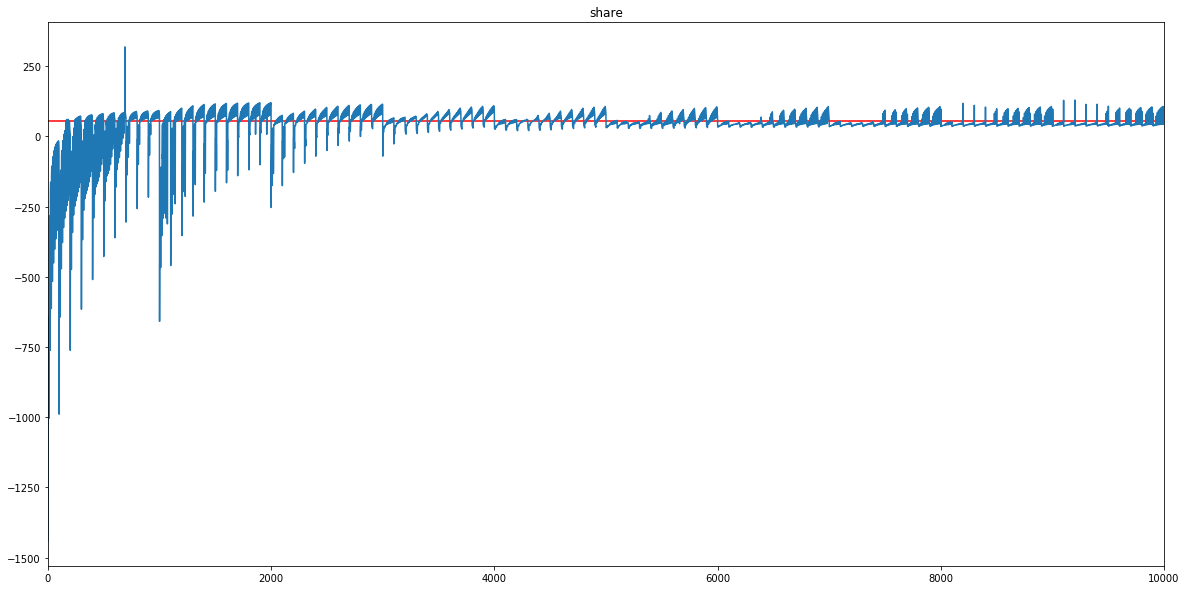

In [13]:
fig = plt.figure(figsize=(20,10))
calibration.shr_inf_emp.plot()
plt.hlines(shr_inf_emp_opt,xmin=0,xmax=800000,colors='r')
# plt.ylim(0,100)
plt.title('share');

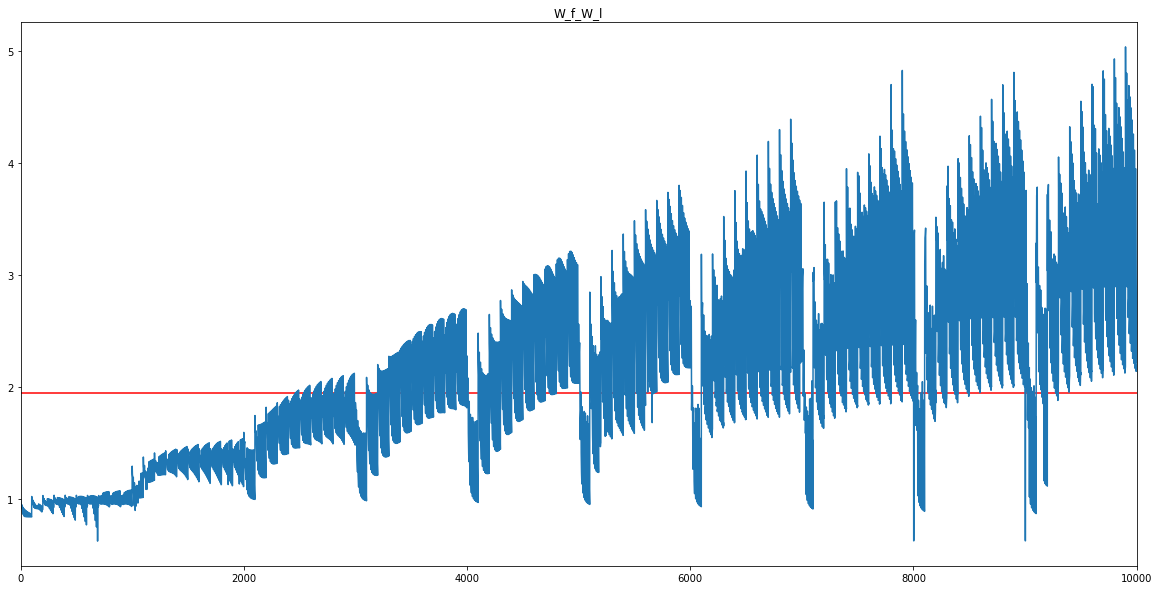

In [14]:
fig = plt.figure(figsize=(20,10))
calibration.w_f_w_l.plot()
plt.hlines(w_f_w_l_opt,xmin=0,xmax=800000,colors='r')
# plt.ylim(1,10)
plt.title('W_f_W_l');

In [15]:
mask1 = abs(calibration.shr_inf_emp - shr_inf_emp_opt) < 2
mask2 = abs(calibration.w_f_w_l - w_f_w_l_opt) < 0.05

In [16]:
solutions = calibration[mask1 & mask2]
print(solutions.shape)
solutions.head()

(30, 7)


,tau_ncsb,lambda_l,z_ub,S,shr_inf_emp,w_f_w_l,cost
2440,1.933333,0.455556,3.277778,0.1,57.996480,1.909709,0.216293
2530,1.933333,0.544444,2.733333,0.1,55.812632,1.930162,0.207597
2630,1.933333,0.633333,2.733333,0.1,57.262179,1.961733,0.201647
2820,1.933333,0.811111,2.188889,0.1,54.492602,1.979890,0.193370
3180,2.800000,0.188889,5.455556,0.1,55.665595,1.935135,0.491372


In [17]:
model_values.loc[solutions.index]

,wf,wi,z1,f_z2,i_z2,z2,se_z1,se_z2,sh_f
2440,1.332468,0.697734,0.022193,-1.608696,1.000000,1.538410,0.019374,1.284108,0.420035
2530,1.351645,0.700275,0.024003,-1.489292,1.000000,1.418730,0.020726,1.161725,0.441874
2630,1.352370,0.689375,0.025962,-1.457677,-0.981081,1.279817,0.023494,1.093697,0.427378
2820,1.370645,0.692283,0.029436,-1.303951,3.310974,1.139862,0.026274,0.946664,0.455074
3180,1.404690,0.725887,0.007713,-2.231461,1.000000,2.698367,0.005993,2.046822,0.443344
3190,1.409219,0.726696,0.008911,-2.238182,1.000000,2.699182,0.006897,2.041181,0.424379
3332,1.490514,0.786628,0.134473,-1.447815,1.455513,2.139298,0.081859,1.192522,0.428347
3423,1.530834,0.795313,0.220332,-1.304172,0.313190,1.978693,0.129758,1.039900,0.443590
3716,1.598785,0.808723,0.432413,-1.013761,2.908877,1.706140,0.242228,0.805560,0.457157
3817,1.610044,0.817656,0.475038,-0.918605,8.358749,1.686421,0.257483,0.749054,0.437698


In [18]:
all_vec_tr = []
tau_l     = 0.468 # Anton uses 0.603
tau_pi_0  = 1/4
tau_pi_tr = 0.09
all_vec_tr = []
cost_tr  = []
results_tr = [] 
x0_tr = [0.1,0.1,0.1,  1,  1.1,  1.1,  1.1,  1.1, .5,1,0.5]

for i in range(len(solutions)):
    tau_ncsb = solutions['tau_ncsb'].iloc[i]
    lambda_l = solutions['lambda_l'].iloc[i]
    z_ub = solutions['z_ub'].iloc[i]
    S = solutions['S'].iloc[i]
    
    res = least_squares(labor_model_self_emp_tr,x0_tr)

    w_f_w_l_tr = res.x[0]/res.x[1]

    shr_inf_emp_tr = (1-res.x[8])*100 
    results_tr.append(res.x)
    cost_tr.append(res.cost)
    all_vec_tr.append([tau_ncsb,lambda_l,z_ub,S,shr_inf_emp_tr,w_f_w_l_tr])

/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/home/torroledo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
calibration_tr = pd.DataFrame(all_vec_tr,columns=['tau_ncsb','lambda_l','z_ub','S','shr_inf_emp_tr','w_f_w_l_tr'])
calibration_tr['cost'] = cost_tr
model_values_tr = pd.DataFrame(np.array(results_tr),columns=['wf','wi','z1','f_z2','i_z2','z2','se_z1','se_z2','sh_f','new','new2'])

In [20]:
calibration_tr.describe()

,tau_ncsb,lambda_l,z_ub,S,shr_inf_emp_tr,w_f_w_l_tr,cost
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.377778,0.580000,3.314074,0.553333,60.820940,1.783165,1.012558
std,0.891223,0.190502,1.340745,0.293746,14.323798,0.402717,0.700997
min,1.933333,0.188889,1.644444,0.100000,51.978983,0.681184,0.211673
25%,2.800000,0.455556,2.325000,0.366667,54.171364,1.862510,0.339360
50%,3.666667,0.588889,2.733333,0.633333,56.043737,1.896682,1.027757
75%,4.316667,0.722222,4.366667,0.811111,57.646931,1.939356,1.247677
max,4.533333,0.900000,6.000000,0.900000,101.812611,2.274620,2.247278


### 2. Model without tax reform

In [ ]:
# changing calibrated parameters
tau_ncsb = 2.252632 # Anton uses 0.016
lambda_l = 0.610526
z_ub     = 1.842105 # Leal: 13
S        = 0.263158 # Leal : 4.25

res = fsolve(labor_model_self_emp,x0)

# results
w_f_w_l = res[0]/res[1]
shr_inf_emp = (1-res[8])*100

print('Ratio:',w_f_w_l )
print('share:',shr_inf_emp)

### 3. Model with tax reform

In [ ]:
# changing calibrated parameters
tau_ncsb = 2.252632 # Anton uses 0.016
lambda_l = 0.610526
z_ub     = 1.842105 # Leal: 13
S        = 0.263158 # Leal : 4.25


# simulation
x0 = [2,    1, 1.1,  1,  1, 1.1,  1,  1,.5,  1, 1]

res = fsolve(labor_model_self_emp_tr,x0)

# results
w_f_w_l_tr = res[0]/res[1]
shr_inf_emp_tr = (1-res[8])*100 
print('Ratio:',w_f_w_l_tr )
print('share:',shr_inf_emp)

# effect tax reform on informality
change_shr_inf_emp     =  shr_inf_emp_tr-shr_inf_emp 
change_shr_inf_emp_per = ((shr_inf_emp_tr-shr_inf_emp)/shr_inf_emp)*100
print('change share:',change_shr_inf_emp)
print('change share per:',change_shr_inf_emp_per)

In [78]:
def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

In [81]:
from scipy.optimize import least_squares
x0_rosenbrock = [2, 2]
res_1 = least_squares(fun_rosenbrock, x0_rosenbrock)